# Loan Default Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Project Data\\Data\\lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

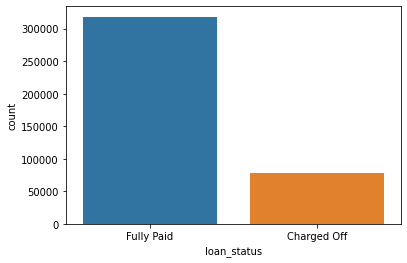

In [11]:
sns.countplot(data=df,x='loan_status')

Text(0.5, 0, 'Loan Amount')

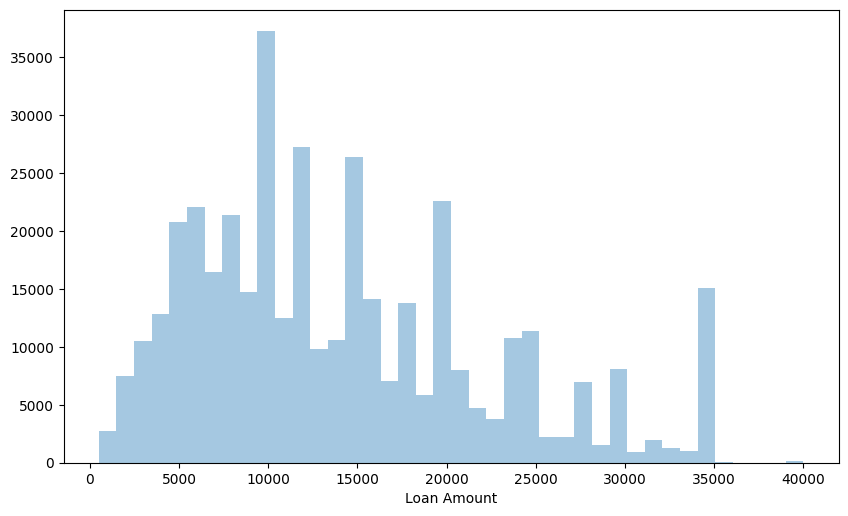

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.distplot(x=df['loan_amnt'],bins=40,kde=False)
plt.xlabel('Loan Amount')

<AxesSubplot:>

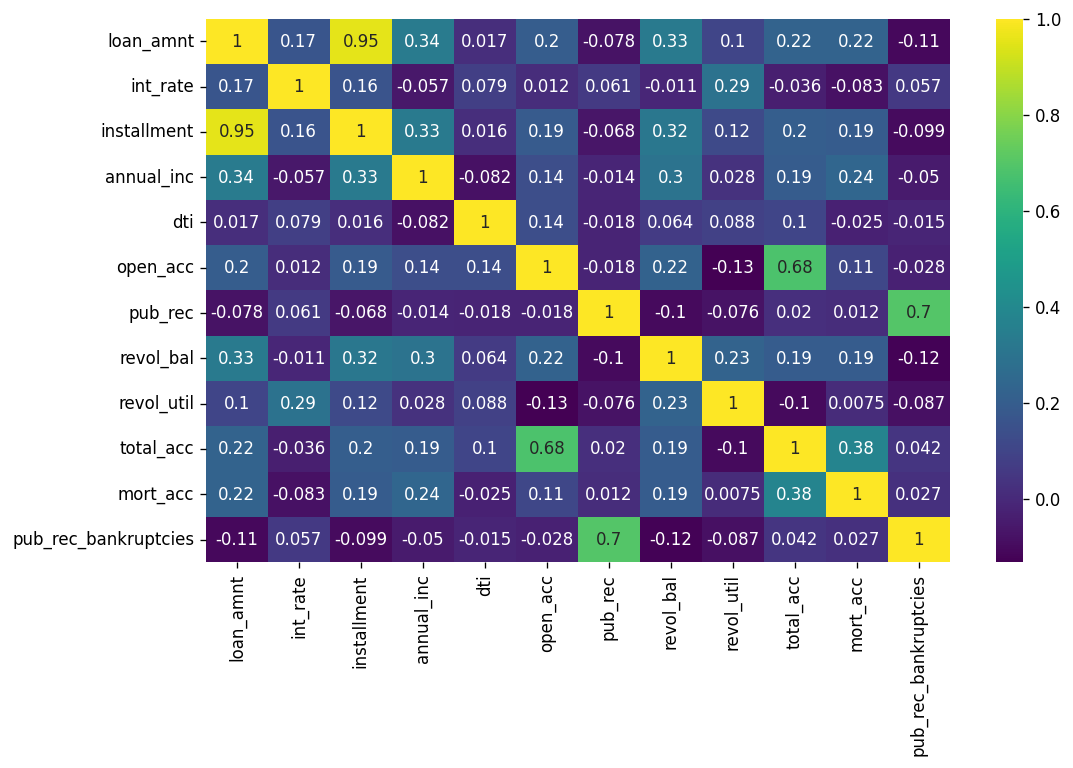

In [25]:
plt.figure(figsize=(10,6),dpi=120)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

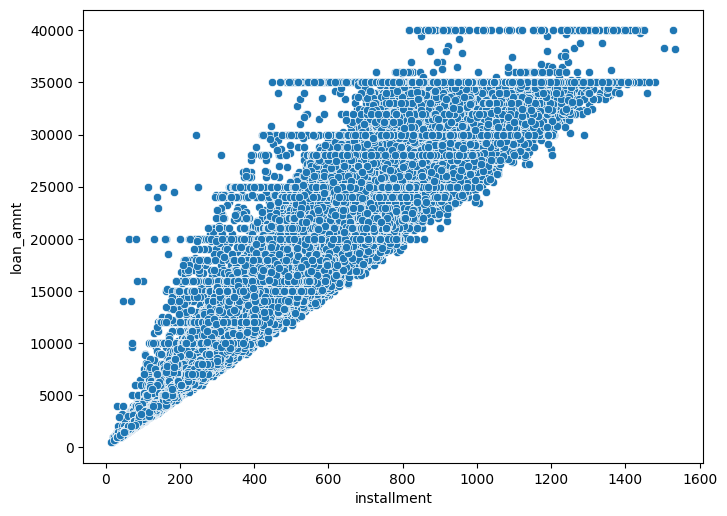

In [27]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

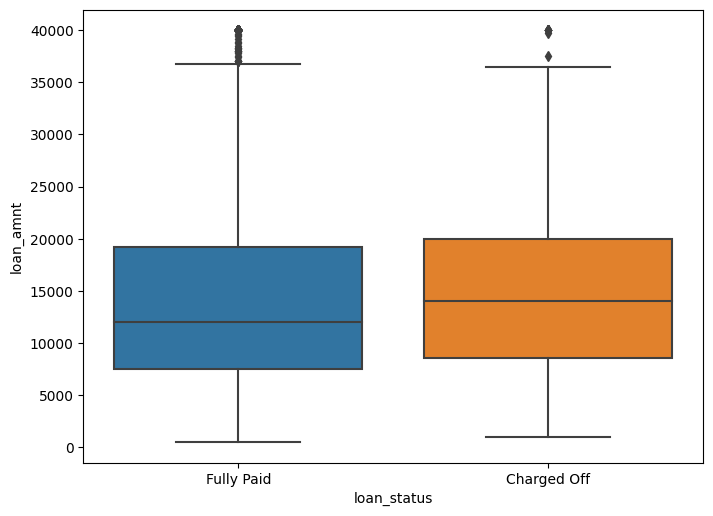

In [29]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [32]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [34]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [39]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

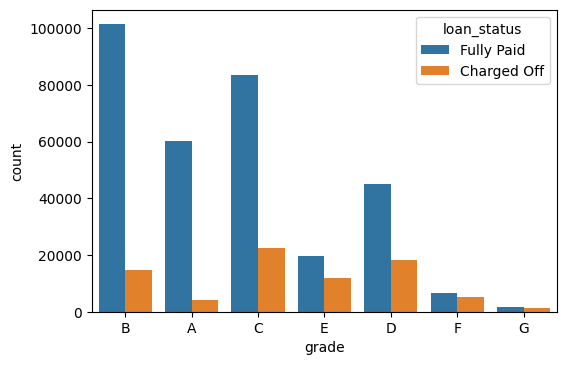

In [41]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

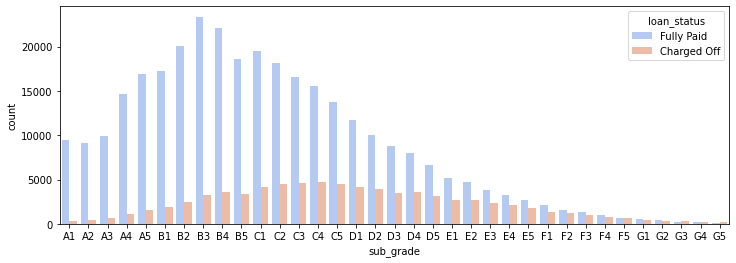

In [42]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

In [44]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [45]:
df['Loan_Repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [48]:
df[['Loan_Repaid','loan_status']]

,Loan_Repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

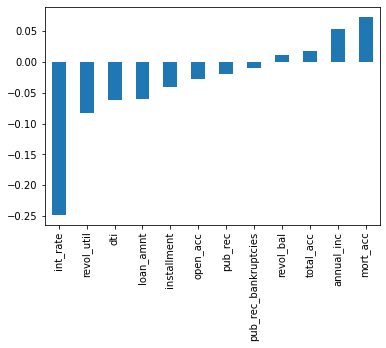

In [53]:
df.corr()['Loan_Repaid'].sort_values().drop('Loan_Repaid').plot(kind='bar')

In [59]:
df.isnull().sum() 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Loan_Repaid                 0
dtype: int64

In [63]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [64]:
len(df['emp_title'].unique())

173106

In [65]:
df.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
Loan_Repaid             0.000000
dtype: float64

In [66]:
df = df.drop('emp_title',axis=1)

In [70]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

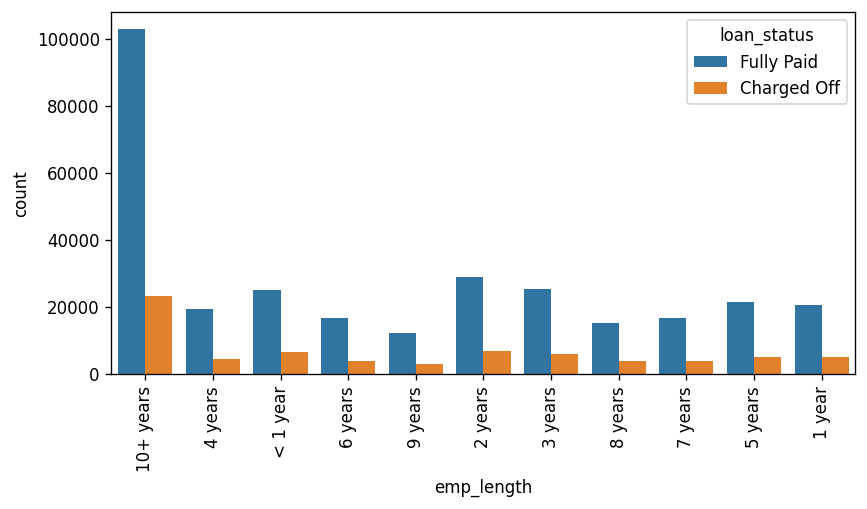

In [77]:
plt.figure(figsize=(8,4),dpi=120)
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.xticks(rotation=90);

In [76]:
sorted_order = [ '< 1 year', '2 years','3 years','4 years','5 years','6 years', '7 years','8 years','9 years','10+ years']

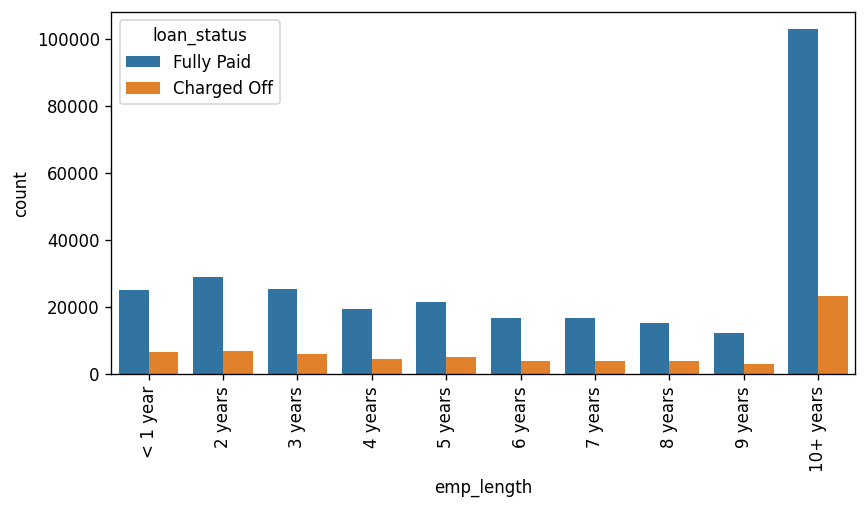

In [79]:
plt.figure(figsize=(8,4),dpi=120)
sns.countplot(data=df,x='emp_length',hue='loan_status',order=sorted_order)
plt.xticks(rotation=90);

# Feature Engineering

In [84]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [81]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [82]:
emp_len = emp_co/emp_fp

In [86]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [87]:
df = df.drop('emp_length',axis=1)

In [89]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Loan_Repaid                 0
dtype: int64

In [92]:
len(df['title'].unique())

48818

In [93]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [94]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [95]:
df = df.drop('title',axis=1)

In [96]:
df.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
Loan_Repaid             0.000000
dtype: float64

In [101]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
Loan_Repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [103]:
df['mort_acc'].mean()

1.8139908160844138

In [105]:
from feature_engine.imputation import MeanMedianImputer
mean_imputer = MeanMedianImputer(imputation_method='mean',variables=['mort_acc'])

In [106]:
mean_imputer.fit(df)

MeanMedianImputer(imputation_method='mean', variables=['mort_acc'])

In [107]:
df = mean_imputer.transform(df)

In [108]:
df.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
Loan_Repaid             0.000000
dtype: float64

In [110]:
mean_imputer.imputer_dict_

{'mort_acc': 1.8139908160844138}

In [111]:
df = df.dropna()

In [112]:
df.isnull().mean()

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
Loan_Repaid             0.0
dtype: float64

In [113]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Loan_Repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [114]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [115]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [117]:
term = ' 36 months'
term[:3]

' 36'

In [118]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\HP\AppData\Local\Temp\ipykernel_1288\2179920926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [120]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [122]:
df = df.drop('grade',axis=1)

In [127]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [128]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [129]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [130]:
df['address'].value_counts()

USCGC Smith\r\nFPO AE 70466                            8
USS Smith\r\nFPO AP 70466                              8
USS Johnson\r\nFPO AE 48052                            8
USNS Johnson\r\nFPO AE 05113                           8
USNS Johnson\r\nFPO AP 48052                           7
                                                      ..
43570 Maxwell Field Apt. 502\r\nEast John, NH 22690    1
9983 Turner Cove\r\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\r\nRalphfurt, CO 29597                 1
3841 Liu Crest\r\nClarkchester, NC 29597               1
787 Michelle Causeway\r\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

In [131]:
df['Zip_Code'] = df['address'].apply(lambda ad: ad[-5:])

In [132]:
df['Zip_Code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: Zip_Code, Length: 395219, dtype: object

In [134]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [135]:
df = df.drop('issue_d',axis=1)

In [137]:
df['earliest_cr_line'] 

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [138]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [143]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [145]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [147]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [146]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'initial_list_status', 'application_type', 'address',
       'Zip_Code'],
      dtype='object')

In [148]:
from feature_engine.encoding import OneHotEncoder
one_hot = OneHotEncoder(variables=['sub_grade', 'home_ownership', 'verification_status','purpose', 'initial_list_status', 'application_type','Zip_Code'])

In [149]:
one_hot.fit(df)

OneHotEncoder(variables=['sub_grade', 'home_ownership', 'verification_status',
                         'purpose', 'initial_list_status', 'application_type',
                         'Zip_Code'])

In [150]:
df = one_hot.transform(df)

In [152]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'address'], dtype='object')

In [153]:
df = df.drop('address',axis=1)

In [161]:
df[['loan_status','Loan_Repaid']]

,loan_status,Loan_Repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [162]:
df = df.drop('loan_status',axis=1)

In [165]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [166]:
len(df)

395219

In [168]:
samp_df = df.sample(frac=0.1,random_state=101)
len(samp_df)

39522

In [169]:
df = df.sample(frac=0.1,random_state=101)

# Data is Ready

In [170]:
X = df.drop('Loan_Repaid',axis=1).values
y = df['Loan_Repaid'].values

In [173]:
X

array([[1.480e+04, 3.600e+01, 1.849e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.100e+04, 6.000e+01, 1.757e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.200e+04, 6.000e+01, 7.890e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.620e+04, 6.000e+01, 2.075e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.100e+04, 6.000e+01, 2.099e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.600e+03, 3.600e+01, 1.064e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [175]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [178]:
X_train = scaler.fit_transform(X_train)

In [179]:
X_test = scaler.transform(X_test)

In [180]:
import tensorflow as tf

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [183]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [186]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=EarlyStopping(patience=3))

Epoch 1/25
109/109 [==============================] - 5s 11ms/step - loss: 0.4525 - val_loss: 0.3353
Epoch 2/25
109/109 [==============================] - 1s 5ms/step - loss: 0.3234 - val_loss: 0.2844
Epoch 3/25
109/109 [==============================] - 1s 5ms/step - loss: 0.2845 - val_loss: 0.2752
Epoch 4/25
109/109 [==============================] - 1s 5ms/step - loss: 0.2753 - val_loss: 0.2739
Epoch 5/25
109/109 [==============================] - 1s 6ms/step - loss: 0.2686 - val_loss: 0.2746
Epoch 6/25
109/109 [==============================] - 1s 5ms/step - loss: 0.2657 - val_loss: 0.2728
Epoch 7/25
109/109 [==============================] - 1s 7ms/step - loss: 0.2610 - val_loss: 0.2736
Epoch 8/25
109/109 [==============================] - 1s 6ms/step - loss: 0.2619 - val_loss: 0.2736
Epoch 9/25
109/109 [==============================] - 1s 5ms/step - loss: 0.2594 - val_loss: 0.2737


In [188]:
model.history.history

{'loss': [0.4525328576564789,
  0.3233562111854553,
  0.2845454216003418,
  0.2752994894981384,
  0.26858246326446533,
  0.26566797494888306,
  0.2609650194644928,
  0.26187482476234436,
  0.25944578647613525],
 'val_loss': [0.3353465795516968,
  0.28443288803100586,
  0.2752176523208618,
  0.2739418148994446,
  0.27460741996765137,
  0.2727970778942108,
  0.2736187279224396,
  0.2735748291015625,
  0.2736755311489105]}

In [189]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

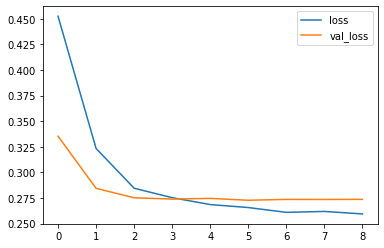

In [190]:
loss[['loss','val_loss']].plot()

In [191]:
from sklearn.metrics import classification_report,confusion_matrix

In [195]:
predictions = model.predict(X_test)

In [196]:
predictions 

array([[0.99992526],
       [0.67291206],
       [0.9999034 ],
       ...,
       [0.7083768 ],
       [0.9174067 ],
       [0.75031346]], dtype=float32)

In [198]:
predictions = np.round(predictions)

In [200]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [203]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.42      0.58      2382
           1       0.87      1.00      0.93      9475

    accuracy                           0.88     11857
   macro avg       0.92      0.71      0.76     11857
weighted avg       0.89      0.88      0.86     11857



In [204]:
confusion_matrix(y_test,predictions)

array([[ 997, 1385],
       [  36, 9439]], dtype=int64)

In [206]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('Loan_Repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt         10000.00
term                 36.00
int_rate              6.49
installment         306.45
annual_inc        30000.00
                    ...   
Zip_Code_70466        0.00
Zip_Code_29597        0.00
Zip_Code_48052        0.00
Zip_Code_86630        0.00
Zip_Code_93700        0.00
Name: 359704, Length: 85, dtype: float64

In [211]:
model.predict(new_customer.values.reshape(1,85))

array([[1.]], dtype=float32)

In [213]:
df.iloc[random_ind]['Loan_Repaid']

1.0

In [214]:
from tensorflow.keras.models import load_model

In [215]:
model.save('loan_default_model.h5')